## Imports

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format)
pd.options.display.max_columns = 30
sns.set(rc = {'figure.figsize':(20,8)});

In [2]:
#load data
data = pd.read_csv('kc_house_data.csv')

def barplot(a,b,data):
    plot = sns.barplot(x=a, y=b, data=data, palette='Greens' )
    return plot

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Transformação dos Dados

In [4]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d' )

# removendo features sem utilidade
data = data.drop(columns = ['sqft_above', 'sqft_living15', 'sqft_lot15'])

Limpeza dos Dados

In [5]:
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
15870,2402100895,2014-06-25,640000.00,33,1.75,1620,6000,1.00,0,0,5,7,580,1947,0,98103,47.69,-122.33


Pela Tabela Descritiva nota-se que o há um imóvel com 33 quartos, no entanto seu preço e área de lote estão próximos dos valores médios, ou seja, seus valores estão distantes dos esperados para um imóvel dessas proporções. Assumiremos então, que houve um erro de digitação e o imóvel será removido do dataset.

In [6]:
data = data.drop(data[data['bedrooms'] == 33].index)

## Análise Descritiva dos Dados

Estatística Descritiva

In [7]:
num_attibutes = data.select_dtypes( include= ['int64','float64'])
num_attibutes = num_attibutes.drop(columns=['zipcode', 'lat','long'])

# central tendency : mean and median
mean = pd.DataFrame(num_attibutes.apply(np.mean, axis=0))
median = pd.DataFrame(num_attibutes.apply(np.median, axis=0))

# dispersion tendency: std, min and max
std = pd.DataFrame(num_attibutes.apply(np.std, axis=0))
min_ = pd.DataFrame(num_attibutes.apply(np.min, axis=0))
max_ = pd.DataFrame(num_attibutes.apply(np.max, axis=0))

att = pd.concat((max_, min_, mean, median,std), axis=1).reset_index()
att.columns = ('attributes','maximum','minimum','mean', 'median','std')
att

,attributes,maximum,minimum,mean,median,std
0,id,9900000190.00,1000102.00,4580402307.49,3904930470.00,2876527410.33
1,price,7700000.00,75000.00,540083.52,450000.00,367126.57
2,bedrooms,11.00,0.00,3.37,3.00,0.91
3,bathrooms,8.00,0.00,2.11,2.25,0.77
4,sqft_living,13540.00,290.00,2079.92,1910.00,918.44
5,sqft_lot,1651359.00,520.00,15107.39,7619.00,41420.47
6,floors,3.50,1.00,1.49,1.50,0.54
7,waterfront,1.00,0.00,0.01,0.00,0.09
8,view,4.00,0.00,0.23,0.00,0.77
9,condition,5.00,1.00,3.41,3.00,0.65


## Feature Engineering

In [8]:
df = data.copy()

# Ano de construção
df['year'] = df['yr_built'].apply(lambda x: 'before_1955' if x < 1955 else 'after_1955')

# Imóveis com porão ou sem
df['porao'] = df['sqft_basement'].apply(lambda x: 'com_porao' if x > 0 else 'sem_porao')


#separando os meses para coletar cada estação do ano
df['month'] = df.date.dt.month

# criação de uma nova feature, indicando as estações do ano
df['season'] = df['month'].apply(lambda x: 'Summer' if 6 <= x <= 8 else 'Fall' if 9 <= x <= 11 else 'Winter' if (x == 12) or (x == 1) or (x == 2) else 'Spring' if 3 <= x <= 5 else None)

# reforma

df['renovated'] = df['yr_renovated'].apply(lambda x: 'no' if x == 0
        else 'yes')

# criar um 'describe' para condição, para acrescentar no relatório

df['describe_condition'] = df['condition'].apply(lambda x: 'too bad' if x == 1 else
                                                         'bad' if x == 2 else
                                                         'median'if x == 3 else
                                                         'good' if x == 4 else
                                                         'excellent')

## Insights

A hipótese é verdadeira. Imóveis que possuem vista para água são, em média, 212.64% mais caros que os demais.


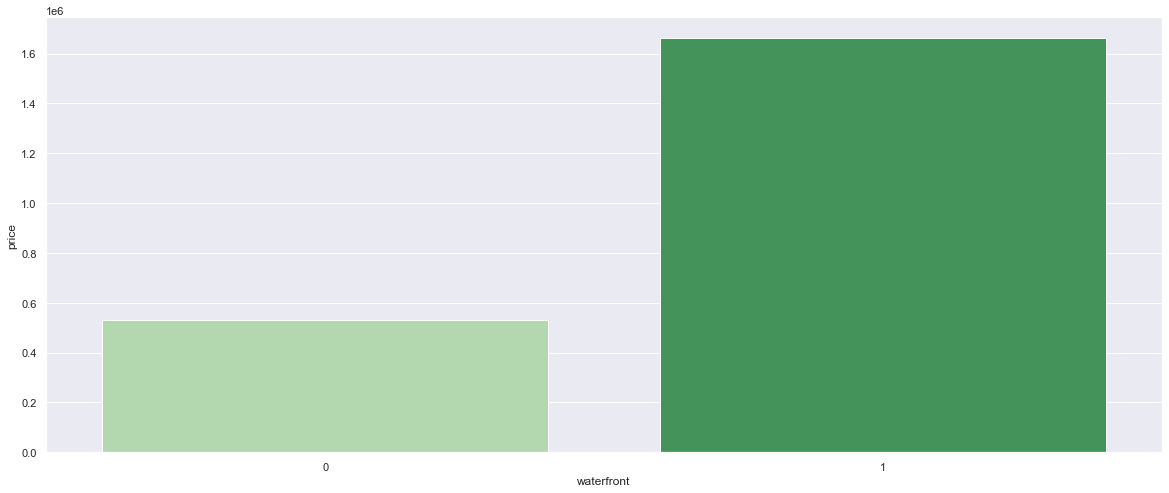

In [9]:
#H1: Imóveis que possuem vista para água, são 30% mais caros, na média.
h1 = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
h1['percentage'] = h1['price'].pct_change()*100

barplot('waterfront', 'price', data=h1)

result = ''
if h1.loc[1, 'percentage'] > 30:
    result = 'verdadeira'
else: 'falsa'

print('A hipótese é {:}. Imóveis que possuem vista para água são, em média, {:.2f}% mais caros que os demais.'
      .format(result, h1.loc[1,'percentage']))

A hipótese é falsa. Imóveis construídos antes do ano de 1955 são, em média, 0.79% mais baratos que os demais.


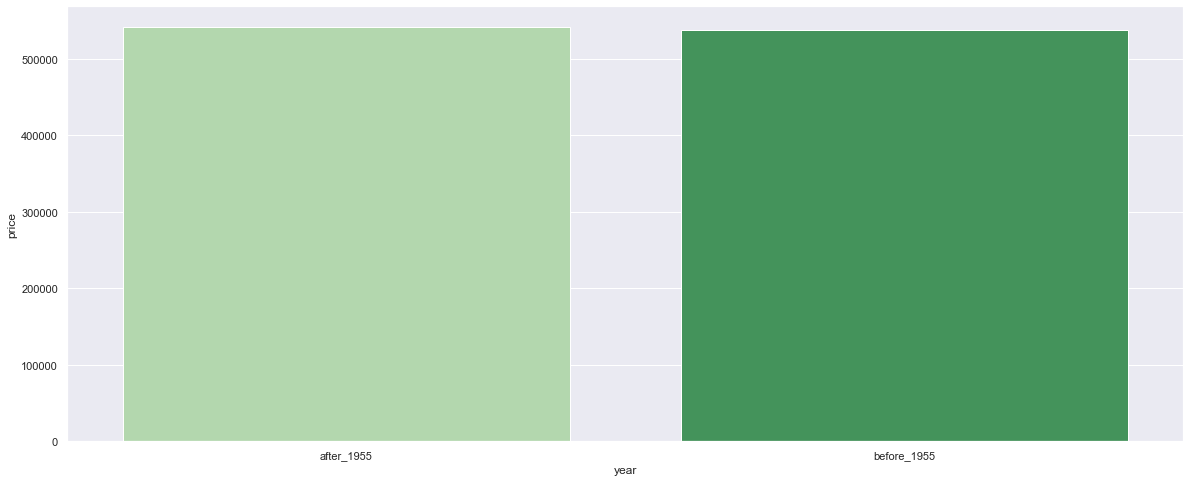

In [10]:
#H2 Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
h2 = df[['year', 'price']].groupby('year').mean().reset_index()

barplot('year', 'price', data=h2);

h2['percent'] = h2['price'].pct_change()*-100

result = ''
if h2.loc[1, 'percent'] > 50:
    result = 'verdadeira'
else: result= 'falsa'

print('A hipótese é {:}. Imóveis construídos antes do ano de 1955 são, em média, {:.2f}% mais baratos que os demais.'
      .format(result, h2.loc[1,'percent']))

A hipótese é falsa. Imóveis sem porão, são, em média, 22.56% maiores que os demais.


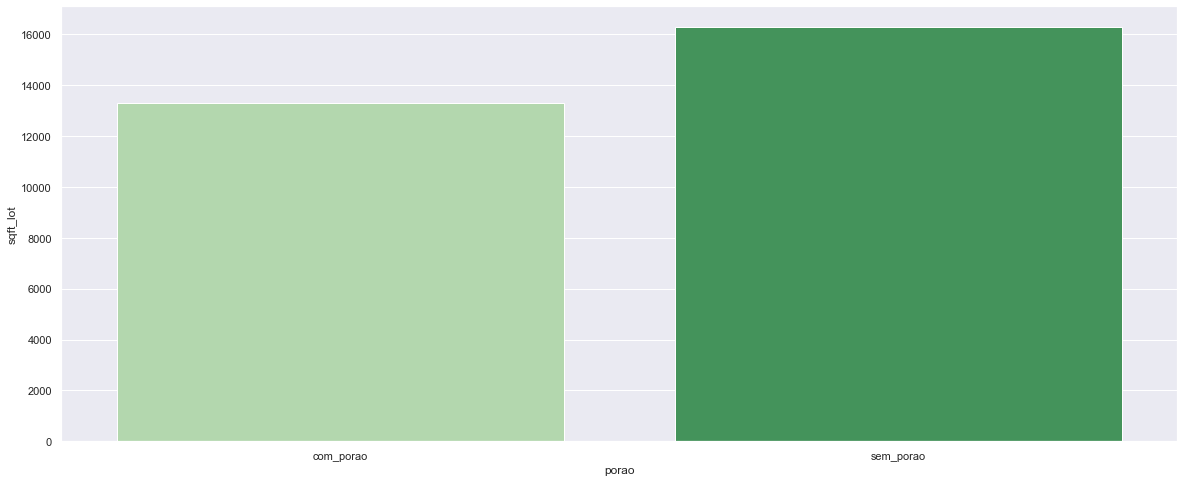

In [11]:
#H3: Imóveis sem porão possuem área total 40% maior que os imóveis com porão.

h3 = df[['porao', 'sqft_lot']].groupby('porao').mean().reset_index()

barplot('porao', 'sqft_lot', data=h3);

h3['percentage'] = h3['sqft_lot'].pct_change()*100
result = ''
if h3.loc[1, 'percentage'] > 40:
    result = 'verdadeira'
else: result= 'falsa'

print('A hipótese é {:}. Imóveis sem porão, são, em média, {:.2f}% maiores que os demais.'
      .format(result, h3.loc[1,'percentage']))

A hipótese é falsa. O crescimento do preço dos imóveis entre os anos, é em média, 0.52% maior.


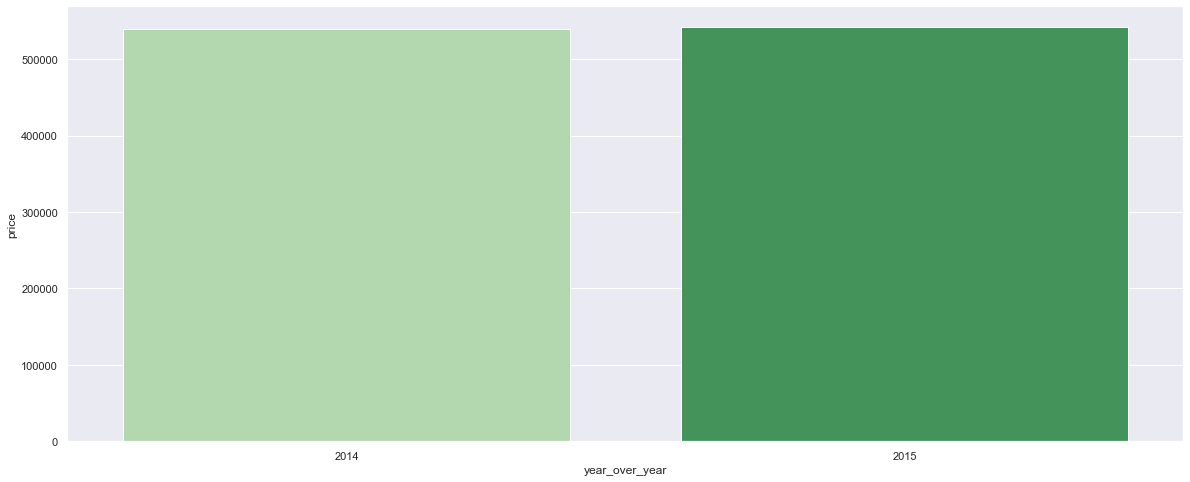

In [12]:
#H4 O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%.

df['year_over_year'] = df['date'].dt.strftime('%Y')

h4 = df[['year_over_year', 'price']].groupby('year_over_year').mean().reset_index()

barplot('year_over_year', 'price', data= h4);

h4['percentage'] = h4['price'].pct_change()*100
result = ''
if h4.loc[1, 'percentage'] > 15:
    result = 'verdadeira'
else: result= 'falsa'

print('A hipótese é {:}. O crescimento do preço dos imóveis entre os anos, é em média, {:.2f}% maior.'
      .format(result, h4.loc[1,'percentage']))

A hipótese é verdadeira. Imóveis com nível elevado de design e construção são 227.21% mais caros que os demais, em média.


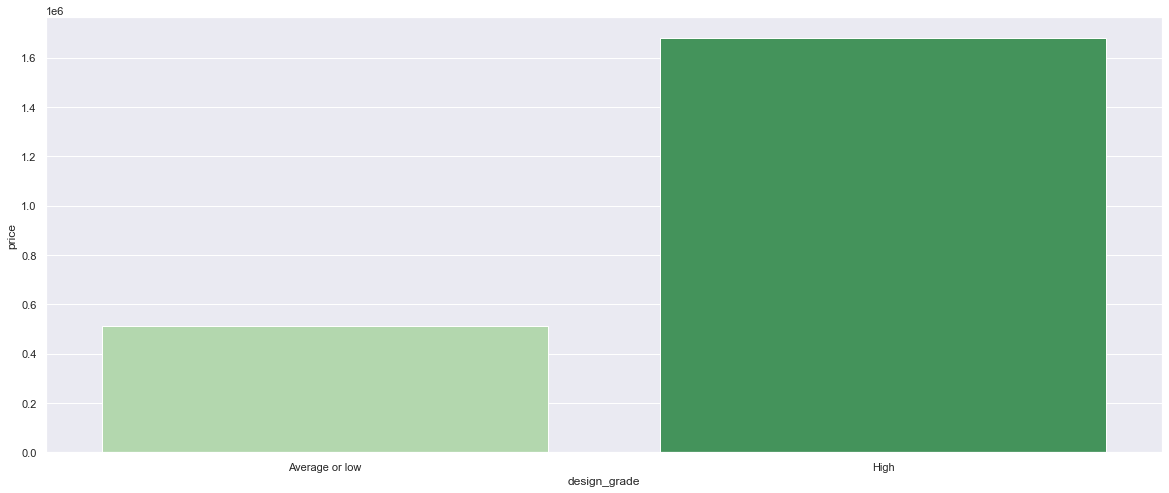

In [13]:
#H5 Imóveis com design de maior qualidade em média são mais caros
df['design_grade'] = df['grade'].apply(lambda x: 'High' if x > 10 else 'Average or low')
                                       
h5 = df[['design_grade', 'price']].groupby('design_grade').mean().reset_index()
h5['pct'] = h5['price'].pct_change()*100

barplot('design_grade', 'price', data=h5);

result = ''
if h5.loc[1, 'pct'] > 50:
    result = 'verdadeira'
else: 
    result = 'falsa'

print('A hipótese é {:}. Imóveis com nível elevado de design e construção são {:.2f}% mais caros que os demais, em média.'
      .format(result, h5.loc[1,'pct'])) 

A hipótese é verdadeira. Imóveis com 3 ou mais vistas, são, em média, 125.34% mais caros que os demais.


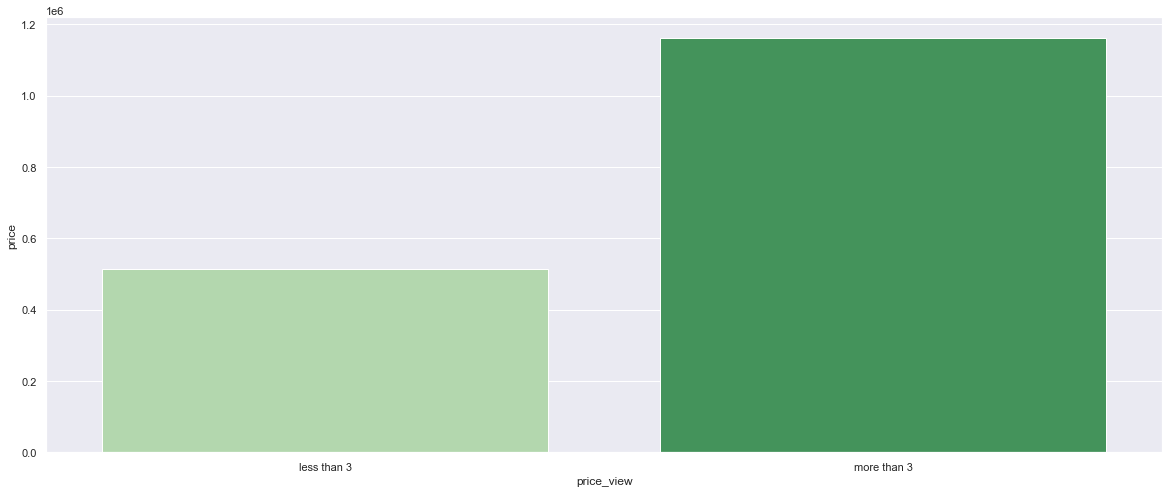

In [14]:
#H6 Imóveis que possuem três ou mais vistas são em média 50% mais caros que os demais
df['price_view'] = df['view'].apply(lambda x: 'more than 3' if x >=3 else 'less than 3')
h6= df[['price_view', 'price']].groupby('price_view').mean().reset_index()
h6['percentage'] = h6['price'].pct_change()*100

barplot('price_view', 'price', data=h6);

result = ''
if h6.loc[1, 'percentage'] > 25:
    result = 'verdadeira'
else: result= 'falsa'

print('A hipótese é {:}. Imóveis com 3 ou mais vistas, são, em média, {:.2f}% mais caros que os demais.'
      .format(result, h6.loc[1,'percentage']))

A hipótese é verdadeira. Imóveis com 2 ou mais andares, são, em média, 29.46% mais caros que os demais.


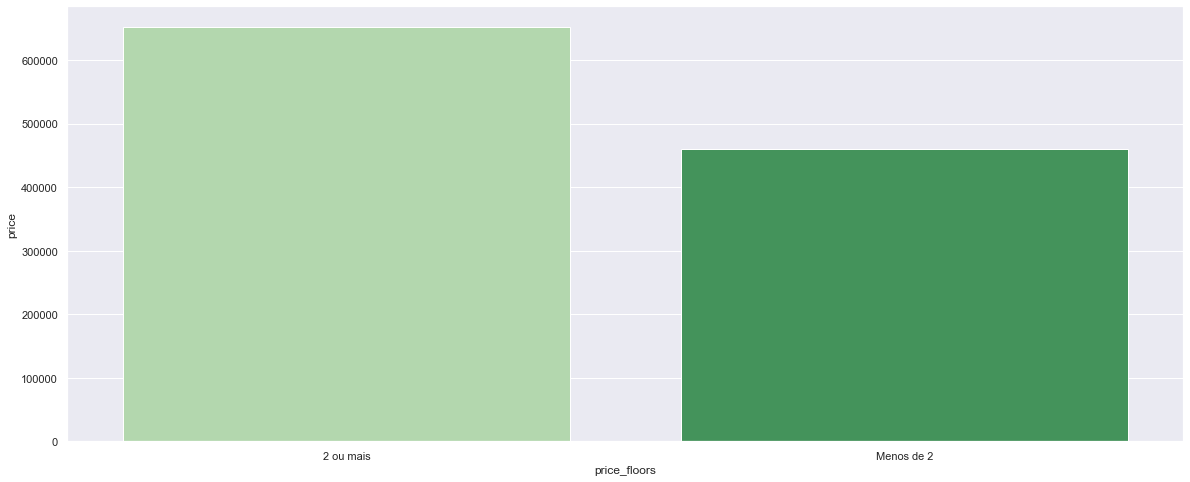

In [15]:
#H7: Imóveis com 2 mais ou andares são 25% mais caros em média

df['price_floors'] = df['floors'].apply(lambda x: "2 ou mais" if x >= 2 else "Menos de 2")
h7 = df[['price_floors', 'price']].groupby('price_floors').mean().reset_index()
h7['percentage'] = h7['price'].pct_change()*-100

barplot('price_floors', 'price', data=h7);

result = ''
if h7.loc[1, 'percentage'] > 25:
    result = 'verdadeira'
else: result= 'falsa'

print('A hipótese é {:}. Imóveis com 2 ou mais andares, são, em média, {:.2f}% mais caros que os demais.'
      .format(result, h7.loc[1,'percentage']))

A hipótese é verdadeira. Imóveis com reforma, são, em média, 43.37% mais caros.


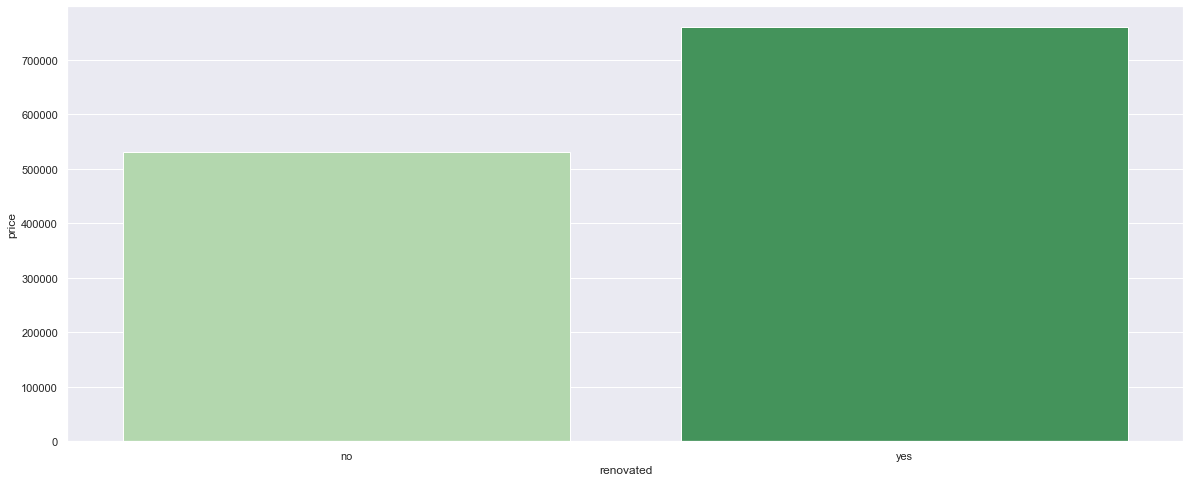

In [16]:
#H8: Imóveis com reforma, são em média 25% mais caros

h8 = df[['renovated','price']].groupby('renovated').mean().reset_index()

barplot('renovated', 'price', data=h8);

h8['percentage'] = h8['price'].pct_change()*100

result = ''
if h8.loc[1, 'percentage'] > 25:
    result = 'verdadeira'
else: result= 'falsa'

print('A hipótese é {:}. Imóveis com reforma, são, em média, {:.2f}% mais caros.'
      .format(result, h8.loc[1,'percentage']))

## Quais são os negócios que a House Rocket deveria comprar e por qual preço?

In [17]:
df1 = df.copy()

In [18]:
df_grouped = df1[['zipcode', 'price']].groupby('zipcode').median().reset_index()

df_grouped = df_grouped.rename(columns={'price': 'median_price'})

In [19]:
# agregando o df1 com o df_grouped, alocando cada preço mediano em cada linha, através do zipcode
df1 = pd.merge(df1, df_grouped, on='zipcode', how='inner')

In [20]:
# criando feature 'status' que recomenda qual o imóvel a house rocket deve comprar ou não
for i in range(len(df1)):
    
    if ((df1.loc[i, 'price']) < (df1.loc[i, 'median_price'])) & (df1.loc[i, 'condition'] >= 3):
        df1.loc[i, 'status'] = 'buy'
    else:
        df1.loc[i, 'status'] = 'not buy'        

In [21]:
# criar relatório com apenas as colunas de interesse, ordenando do menor preço para o maior, considerando as melhores condições de imóveis para compra
buy_houses = df1[df1['status'] == 'buy'].sort_values(by=['describe_condition','price'])
buy_houses[['id','zipcode','price','median_price','condition']].head()

print('Foram encontrados {} imóveis dentro das condições acima, sugeridos para compra'.format(len(buy_houses)))

Foram encontrados 10579 imóveis dentro das condições acima, sugeridos para compra


## Uma vez o imóvel comprado, qual o melhor momento para vendê-lo e por qual preço?

In [22]:
df2 = df1.copy()

In [23]:
# Condições de venda:
# 1. Se o preço da compra for maior que a mediana da região + sazonalidade.
# O preço da venda será igual ao preço da compra + 10%
# 2. Se o preço da compra for menor que a mediana da região + sazonalidade.
# O preço da venda será igual ao preço da compra + 30%

df2['selling_price'] = 'NA'
for i in range(len(df2)):
    
    if df2.loc[i, 'price'] > df2.loc[i, 'median_price']:
        df2.loc[i, 'selling_price'] = (df2.loc[i, 'price'] * 1.10)
        
    else: 
        df2.loc[i, 'selling_price'] = (df2.loc[i, 'price'] * 1.30)     

In [24]:
#calculando o lucro
df2['profit'] = df2['selling_price'] - df2['price']

In [25]:
# relatório final: Sugestões de compra, com possíveis indicadores de preço de venda e lucro
df2[['id','zipcode','price','median_price','season','describe_condition','selling_price','profit']].head()

,id,zipcode,price,median_price,season,describe_condition,selling_price,profit
0,7129300520,98178,221900.00,278277.00,Fall,median,288470.00,66570.00
1,4060000240,98178,205425.00,278277.00,Summer,good,267052.50,61627.50
2,4058801670,98178,445000.00,278277.00,Summer,median,489500.00,44500.00
3,2976800796,98178,236000.00,278277.00,Fall,median,306800.00,70800.00
4,6874200960,98178,170000.00,278277.00,Winter,median,221000.00,51000.00
